In [61]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path

import missingno as msno

%matplotlib inline

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image
import numpy.matlib

In [2]:
# Reading price data from stocks 
temp_csv = Path("Resources/s_PX.csv")
s_price=pd.read_csv(temp_csv)
s_price.set_index(pd.to_datetime(s_price['Date'], infer_datetime_format=True), inplace=True)
s_price.drop(columns=['Date'], inplace=True)
s_price = s_price.dropna(how='all')
s_price.head(2)

,ILMN UW Equity,EIX UN Equity,GPS UN Equity,ES UN Equity,NLOK UW Equity,AET UN Equity,MCO UN Equity,RMD UN Equity,LYB UN Equity,AXP UN Equity,...,ALGN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-02,NaN,14.7333,10.5489,6.3683,2.4012,NaN,NaN,NaN,NaN,19.4629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-05,NaN,14.5639,10.6810,6.5333,2.6207,NaN,NaN,NaN,NaN,19.4904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Reading price data from stocks - monthly
s_price_m=s_price.copy()
s_price_m.reset_index(inplace=True)
s_price_m.Date = pd.to_datetime(s_price_m.Date)
s_price_m=s_price_m.resample('m', on='Date').last()
s_price_m.drop(columns=['Date'], inplace=True)
s_price_m.head(2)

,ILMN UW Equity,EIX UN Equity,GPS UN Equity,ES UN Equity,NLOK UW Equity,AET UN Equity,MCO UN Equity,RMD UN Equity,LYB UN Equity,AXP UN Equity,...,ALGN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-31,NaN,14.5639,11.7944,6.4673,2.5933,NaN,NaN,NaN,NaN,18.3527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-28,NaN,14.9704,13.4928,6.5993,2.7648,NaN,NaN,NaN,NaN,19.7508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Calculating sector returns 
s_ret = s_price.pct_change()
s_ret = s_ret.dropna(how='all')
s_ret.head(2)

,ILMN UW Equity,EIX UN Equity,GPS UN Equity,ES UN Equity,NLOK UW Equity,AET UN Equity,MCO UN Equity,RMD UN Equity,LYB UN Equity,AXP UN Equity,...,ALGN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-05,NaN,-0.011498,0.012523,0.025910,0.091413,NaN,NaN,NaN,NaN,0.001413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-06,NaN,-0.009297,-0.005299,0.010102,0.000000,NaN,NaN,NaN,NaN,-0.020395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Reading market cap data from stocks 
temp_csv = Path("Resources/s_MarketCap.csv")
s_mkt=pd.read_csv(temp_csv)
s_mkt.set_index(pd.to_datetime(s_mkt['Date'], infer_datetime_format=True), inplace=True)
s_mkt.drop(columns=['Date'], inplace=True)
s_mkt = s_mkt.dropna(how='all')
s_mkt.head(2) 

C:\Users\aovelar\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ILMN UW Equity,EIX UN Equity,GPS UN Equity,ES UN Equity,NLOK UW Equity,AET UN Equity,MCO UN Equity,RMD UN Equity,LYB UN Equity,AXP UN Equity,...,ALGN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-30,NaN,10399.3620,15436.0545,1577.9225,1327.6778,NaN,NaN,NaN,NaN,39031.8495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-27,NaN,10689.5767,17658.8463,1610.1250,1421.9855,NaN,NaN,NaN,NaN,42005.1495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Reading fundamental data for stocks 
temp_csv = Path("Resources/s_DebttoEquity.csv")
s_fund1=pd.read_csv(temp_csv)
s_fund1.set_index(pd.to_datetime(s_fund1['Date'], infer_datetime_format=True), inplace=True)
s_fund1.drop(columns=['Date'], inplace=True)
s_fund1 = s_mkt.dropna(how='all')
s_fund1.head(2)

,ILMN UW Equity,EIX UN Equity,GPS UN Equity,ES UN Equity,NLOK UW Equity,AET UN Equity,MCO UN Equity,RMD UN Equity,LYB UN Equity,AXP UN Equity,...,ALGN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-30,NaN,10399.3620,15436.0545,1577.9225,1327.6778,NaN,NaN,NaN,NaN,39031.8495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-27,NaN,10689.5767,17658.8463,1610.1250,1421.9855,NaN,NaN,NaN,NaN,42005.1495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Reading fundamental data for stocks 
temp_csv = Path("Resources/s_NetIncomeMargin.csv")
s_fund2=pd.read_csv(temp_csv)
s_fund2.set_index(pd.to_datetime(s_fund2['Date'], infer_datetime_format=True), inplace=True)
s_fund2.drop(columns=['Date'], inplace=True)
s_fund2 = s_mkt.dropna(how='all')
s_fund2.head(2)

,ILMN UW Equity,EIX UN Equity,GPS UN Equity,ES UN Equity,NLOK UW Equity,AET UN Equity,MCO UN Equity,RMD UN Equity,LYB UN Equity,AXP UN Equity,...,ALGN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-30,NaN,10399.3620,15436.0545,1577.9225,1327.6778,NaN,NaN,NaN,NaN,39031.8495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-27,NaN,10689.5767,17658.8463,1610.1250,1421.9855,NaN,NaN,NaN,NaN,42005.1495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Reading fundamental data for stocks 
temp_csv = Path("Resources/s_FreeCashFlowEquity.csv")
s_fund3=pd.read_csv(temp_csv)
s_fund3.set_index(pd.to_datetime(s_fund3['Date'], infer_datetime_format=True), inplace=True)
s_fund3.drop(columns=['Date'], inplace=True)
s_fund3 = s_mkt.dropna(how='all')
s_fund3.head(2)

,ILMN UW Equity,EIX UN Equity,GPS UN Equity,ES UN Equity,NLOK UW Equity,AET UN Equity,MCO UN Equity,RMD UN Equity,LYB UN Equity,AXP UN Equity,...,ALGN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-30,NaN,10399.3620,15436.0545,1577.9225,1327.6778,NaN,NaN,NaN,NaN,39031.8495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-27,NaN,10689.5767,17658.8463,1610.1250,1421.9855,NaN,NaN,NaN,NaN,42005.1495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Reading fundamental data for stocks 
temp_csv = Path("Resources/s_GrossMargin.csv")
s_fund4=pd.read_csv(temp_csv)
s_fund4.set_index(pd.to_datetime(s_fund4['Date'], infer_datetime_format=True), inplace=True)
s_fund4.drop(columns=['Date'], inplace=True)
s_fund4 = s_mkt.dropna(how='all')
s_fund4.head(2)

,ILMN UW Equity,EIX UN Equity,GPS UN Equity,ES UN Equity,NLOK UW Equity,AET UN Equity,MCO UN Equity,RMD UN Equity,LYB UN Equity,AXP UN Equity,...,ALGN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-30,NaN,10399.3620,15436.0545,1577.9225,1327.6778,NaN,NaN,NaN,NaN,39031.8495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-27,NaN,10689.5767,17658.8463,1610.1250,1421.9855,NaN,NaN,NaN,NaN,42005.1495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Reading fundamental data for stocks 
temp_csv = Path("Resources/s_PB.csv")
s_fund5=pd.read_csv(temp_csv)
s_fund5.set_index(pd.to_datetime(s_fund5['Date'], infer_datetime_format=True), inplace=True)
s_fund5.drop(columns=['Date'], inplace=True)
s_fund5 = s_mkt.dropna(how='all')
s_fund5.head(2)

,ILMN UW Equity,EIX UN Equity,GPS UN Equity,ES UN Equity,NLOK UW Equity,AET UN Equity,MCO UN Equity,RMD UN Equity,LYB UN Equity,AXP UN Equity,...,ALGN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-30,NaN,10399.3620,15436.0545,1577.9225,1327.6778,NaN,NaN,NaN,NaN,39031.8495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-27,NaN,10689.5767,17658.8463,1610.1250,1421.9855,NaN,NaN,NaN,NaN,42005.1495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Reading fundamental data for stocks 
temp_csv = Path("Resources/s_ROE.csv")
s_fund6=pd.read_csv(temp_csv)
s_fund6.set_index(pd.to_datetime(s_fund6['Date'], infer_datetime_format=True), inplace=True)
s_fund6.drop(columns=['Date'], inplace=True)
s_fund6 = s_mkt.dropna(how='all')
s_fund6.head(2)

,ILMN UW Equity,EIX UN Equity,GPS UN Equity,ES UN Equity,NLOK UW Equity,AET UN Equity,MCO UN Equity,RMD UN Equity,LYB UN Equity,AXP UN Equity,...,ALGN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-30,NaN,10399.3620,15436.0545,1577.9225,1327.6778,NaN,NaN,NaN,NaN,39031.8495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-27,NaN,10689.5767,17658.8463,1610.1250,1421.9855,NaN,NaN,NaN,NaN,42005.1495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Reading fundamental data for stocks 
temp_csv = Path("Resources/s_ROA.csv")
s_fund7=pd.read_csv(temp_csv)
s_fund7.set_index(pd.to_datetime(s_fund7['Date'], infer_datetime_format=True), inplace=True)
s_fund7.drop(columns=['Date'], inplace=True)
s_fund7 = s_mkt.dropna(how='all')
s_fund7.head(2)

,ILMN UW Equity,EIX UN Equity,GPS UN Equity,ES UN Equity,NLOK UW Equity,AET UN Equity,MCO UN Equity,RMD UN Equity,LYB UN Equity,AXP UN Equity,...,ALGN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-30,NaN,10399.3620,15436.0545,1577.9225,1327.6778,NaN,NaN,NaN,NaN,39031.8495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-27,NaN,10689.5767,17658.8463,1610.1250,1421.9855,NaN,NaN,NaN,NaN,42005.1495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Reading fundamental data for stocks 
temp_csv = Path("Resources/s_PE.csv")
s_fund8=pd.read_csv(temp_csv)
s_fund8.set_index(pd.to_datetime(s_fund8['Date'], infer_datetime_format=True), inplace=True)
s_fund8.drop(columns=['Date'], inplace=True)
s_fund8 = s_mkt.dropna(how='all')
s_fund8.head(2)

,ILMN UW Equity,EIX UN Equity,GPS UN Equity,ES UN Equity,NLOK UW Equity,AET UN Equity,MCO UN Equity,RMD UN Equity,LYB UN Equity,AXP UN Equity,...,ALGN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-30,NaN,10399.3620,15436.0545,1577.9225,1327.6778,NaN,NaN,NaN,NaN,39031.8495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-27,NaN,10689.5767,17658.8463,1610.1250,1421.9855,NaN,NaN,NaN,NaN,42005.1495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
##Building monthly feature set for stocks 
window_year=252
window_month=21
window_quarter=63

s_feat1=s_price/s_price.shift(window_year)-1 #Price momentum 12M 
s_feat2=s_price.shift(window_month)/s_price.shift(window_year)-1 #Price momentum 12M-1M 
s_feat3=s_price/s_price.rolling(window_year).max() #Price to 52W High 
s_feat4=s_price/s_price.rolling(window_year).min() #Price to 52W low 
s_feat5=s_price/s_price.shift(window_month)-1 #Return 1M
s_feat6=s_price/s_price.shift(window_quarter)-1 #Return 1Q
s_feat7=s_price/s_price.shift(window_year*5)-1 #Return 60M
s_feat8=s_ret.rolling(window_month).max() #Maximum daily return over 1M
s_feat9=s_ret.rolling(window_month).std() #Realized vol 1M
s_feat10=s_ret.rolling(window_quarter).std() #Realized vol 3M
s_feat11=np.log(s_mkt) #Log Market capitalization - already monthly
s_feat11.head()

,ILMN UW Equity,EIX UN Equity,GPS UN Equity,ES UN Equity,NLOK UW Equity,AET UN Equity,MCO UN Equity,RMD UN Equity,LYB UN Equity,AXP UN Equity,...,ALGN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-30,NaN,9.249500,9.644461,7.363864,7.191187,NaN,NaN,NaN,NaN,10.572133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-27,NaN,9.277024,9.778992,7.384067,7.259809,NaN,NaN,NaN,NaN,10.645547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-03-31,NaN,9.309105,9.785961,7.530074,7.326981,NaN,NaN,NaN,NaN,10.664792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-04-30,NaN,9.323889,9.914515,7.516887,7.412258,NaN,NaN,NaN,NaN,10.760321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-05-29,NaN,9.287226,9.963132,7.638906,7.217794,NaN,NaN,NaN,NaN,10.766430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# monthly features 
#s_feature
s_feat1.reset_index(inplace=True)
s_feat1.Date = pd.to_datetime(s_feat1.Date)
s_feat1=s_feat1.resample('m', on='Date').last()
s_feat1.drop(columns=['Date'], inplace=True)
s_feat1.dropna(how='all',inplace=True)
s_feat1.head()
#s_feature
s_feat2.reset_index(inplace=True)
s_feat2.Date = pd.to_datetime(s_feat2.Date)
s_feat2=s_feat2.resample('m', on='Date').last()
s_feat2.drop(columns=['Date'], inplace=True)
s_feat2.dropna(how='all',inplace=True)
s_feat2.head()
#s_feature
s_feat3.reset_index(inplace=True)
s_feat3.Date = pd.to_datetime(s_feat3.Date)
s_feat3=s_feat3.resample('m', on='Date').last()
s_feat3.drop(columns=['Date'], inplace=True)
s_feat3.dropna(how='all',inplace=True)
s_feat3.head()
#s_feature
s_feat4.reset_index(inplace=True)
s_feat4.Date = pd.to_datetime(s_feat4.Date)
s_feat4=s_feat4.resample('m', on='Date').last()
s_feat4.drop(columns=['Date'], inplace=True)
s_feat4.dropna(how='all',inplace=True)
s_feat4.head()
#s_feature
s_feat5.reset_index(inplace=True)
s_feat5.Date = pd.to_datetime(s_feat5.Date)
s_feat5=s_feat5.resample('m', on='Date').last()
s_feat5.drop(columns=['Date'], inplace=True)
s_feat5.dropna(how='all',inplace=True)
s_feat5.head()
#s_feature
s_feat6.reset_index(inplace=True)
s_feat6.Date = pd.to_datetime(s_feat6.Date)
s_feat6=s_feat6.resample('m', on='Date').last()
s_feat6.drop(columns=['Date'], inplace=True)
s_feat6.dropna(how='all',inplace=True)
##Building s_feature set - monthly s_features 
s_feat1.reset_index(inplace=True)
s_feat1.Date = pd.to_datetime(s_feat1.Date)
s_feat1=s_feat1.resample('m', on='Date').last()
s_feat1.drop(columns=['Date'], inplace=True)
s_feat1.dropna(how='all',inplace=True)
s_feat6.head()
#s_feature
s_feat7.reset_index(inplace=True)
s_feat7.Date = pd.to_datetime(s_feat7.Date)
s_feat7=s_feat7.resample('m', on='Date').last()
s_feat7.drop(columns=['Date'], inplace=True)
s_feat7.dropna(how='all',inplace=True)
s_feat7.head()
#s_feature
s_feat8.reset_index(inplace=True)
s_feat8.Date = pd.to_datetime(s_feat8.Date)
s_feat8=s_feat8.resample('m', on='Date').last()
s_feat8.drop(columns=['Date'], inplace=True)
s_feat8.dropna(how='all',inplace=True)
s_feat8.head()
#s_feature
s_feat9.reset_index(inplace=True)
s_feat9.Date = pd.to_datetime(s_feat9.Date)
s_feat9=s_feat9.resample('m', on='Date').last()
s_feat9.drop(columns=['Date'], inplace=True)
s_feat9.dropna(how='all',inplace=True)
s_feat9.head()
#s_feature
s_feat10.reset_index(inplace=True)
s_feat10.Date = pd.to_datetime(s_feat10.Date)
s_feat10=s_feat10.resample('m', on='Date').last()
s_feat10.drop(columns=['Date'], inplace=True)
s_feat10.dropna(how='all',inplace=True)
s_feat10.head()

,ILMN UW Equity,EIX UN Equity,GPS UN Equity,ES UN Equity,NLOK UW Equity,AET UN Equity,MCO UN Equity,RMD UN Equity,LYB UN Equity,AXP UN Equity,...,ALGN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
1998-04-30,NaN,0.012722,0.019796,0.017266,0.023219,NaN,NaN,NaN,NaN,0.017749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-05-31,NaN,0.013556,0.018405,0.019302,0.032647,NaN,NaN,NaN,NaN,0.018920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-06-30,NaN,0.013708,0.019771,0.018514,0.038364,NaN,NaN,NaN,NaN,0.020160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-07-31,NaN,0.011532,0.021897,0.014998,0.044125,NaN,NaN,NaN,NaN,0.017978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-08-31,NaN,0.011005,0.030249,0.014174,0.042531,NaN,NaN,NaN,NaN,0.027041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
rank_f=s_feat10.rank(axis=1)/np.matlib.repmat(rank_f.max(axis=1), 1, np.size(rank_f,0))
#/sum(~np.isnan(rank_f))
#rank_f.head()
#print(rank_f.iloc[0].max())
#rank_f.max(axis=1)

ValueError: Unable to coerce to DataFrame, shape must be (261, 505): given (1, 68121)

In [66]:
np.size(rank_f,0)

261

In [54]:
np.matlib.repmat(rank_f.max(axis=1), 1, np.size(rank_f,0))

array([[        nan, -0.35131096, -0.44409119, ...,         nan,
                nan,         nan],
       [        nan, -0.28496722, -0.58792578, ...,         nan,
                nan,         nan],
       [        nan, -0.27289507, -0.44671135, ...,         nan,
                nan,         nan],
       ...,
       [-0.6792075 ,  0.02769418,  0.50830524, ..., -0.60946777,
        -0.73209474, -0.23388725],
       [-0.75568831,  0.11562947,  0.22520371, ..., -0.58923814,
        -0.68727889,  0.14915203],
       [-0.85578424,  0.11461335, -0.07266899, ..., -0.58954496,
        -0.70476458,  0.03507599]])

In [49]:
sum(~np.isnan(rank_f))

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [38]:
sum(~np.isnan(rank_f.iloc[0]))

337

In [16]:
# Reading price data from indices 
temp_csv = Path("Resources/prices.csv")
df_price=pd.read_csv(temp_csv)
df_price.set_index(pd.to_datetime(df_price['Date'], infer_datetime_format=True), inplace=True)
df_price.drop(columns=['Date'], inplace=True)
df_price.head()

,SPXT Index,XLB US Equity,XLE US Equity,XLF US Equity,XLI US Equity,XLK US Equity,XLP US Equity,XLRE US Equity,XLU US Equity,XLV US Equity,XLY US Equity
Date,,,,,,,,,,,
1994-01-03,567.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-04,569.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-05,569.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-06,569.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-07,572.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Reading volume data from indices 
temp_csv = Path("Resources/volume.csv")
df_volume=pd.read_csv(temp_csv)
df_volume.set_index(pd.to_datetime(df_volume['Date'], infer_datetime_format=True), inplace=True)
df_volume.drop(columns=['Date'], inplace=True)
df_volume.head()

,SPXT Index,XLB US Equity,XLE US Equity,XLF US Equity,XLI US Equity,XLK US Equity,XLP US Equity,XLRE US Equity,XLU US Equity,XLV US Equity,XLY US Equity
Date,,,,,,,,,,,
1994-01-03,172606600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-04,205914600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-05,258841800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-06,247539300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-07,221043000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Reading price data from indices 
temp_csv = Path("Resources/mkt_cap.csv")
df_mktcap=pd.read_csv(temp_csv)
df_mktcap.set_index(pd.to_datetime(df_mktcap['Date'], infer_datetime_format=True), inplace=True)
df_mktcap.drop(columns=['Date'], inplace=True)
df_mktcap.head()

,SPXT Index,XLB US Equity,XLE US Equity,XLF US Equity,XLI US Equity,XLK US Equity,XLP US Equity,XLRE US Equity,XLU US Equity,XLV US Equity,XLY US Equity
Date,,,,,,,,,,,
1994-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


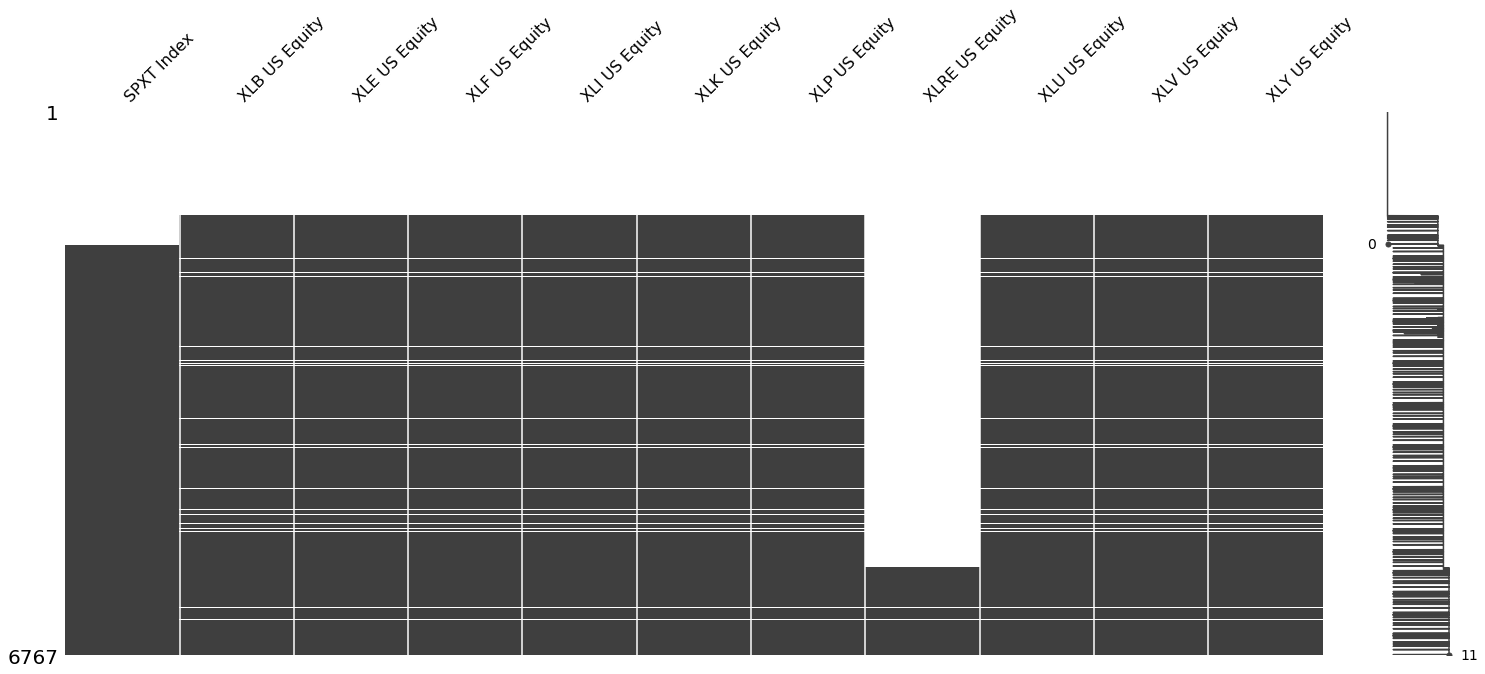

In [19]:
#Checkig completeness of data so we can set a proper starting point 
msno.matrix(df_mktcap)

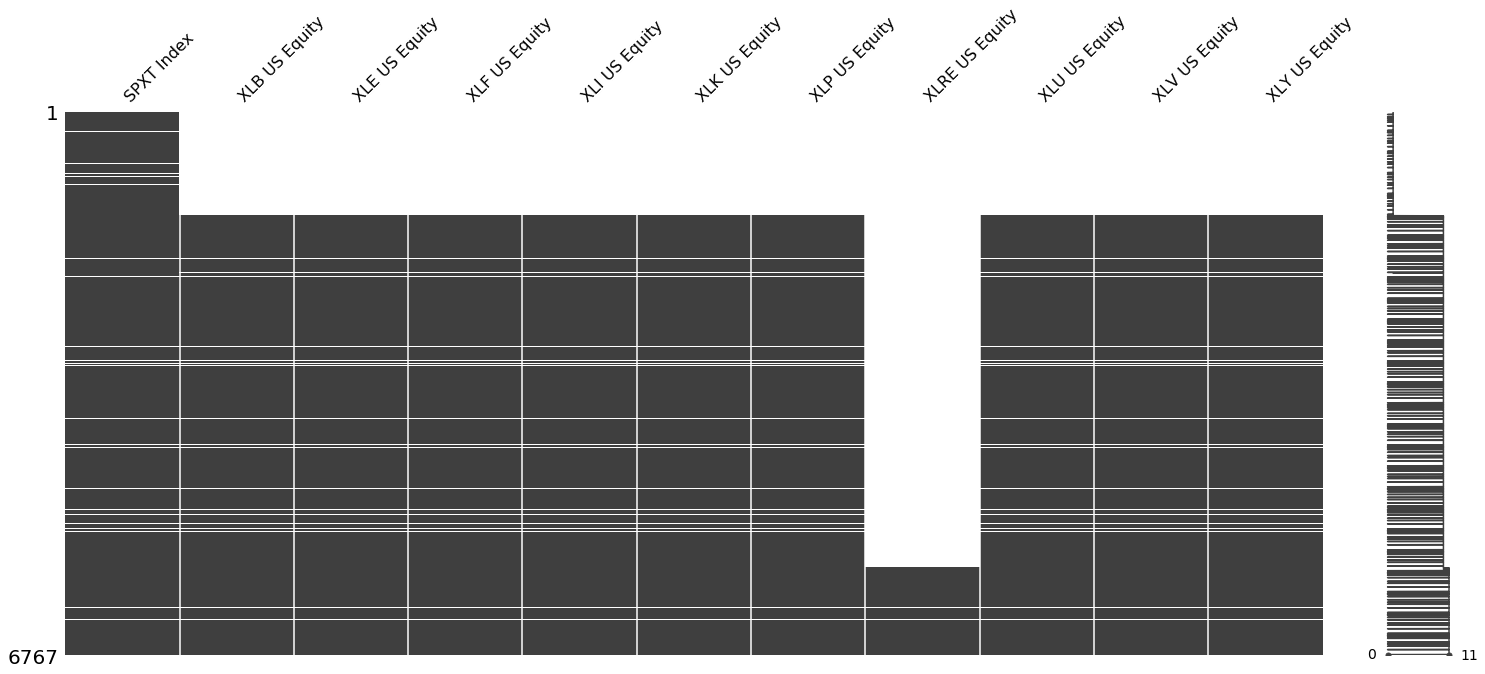

In [20]:
#Checkig completeness of data so we can set a proper starting point 
msno.matrix(df_price)

In [21]:
df_price_clean=df_price[1306:]
df_price_clean.drop(columns=['XLRE US Equity'], inplace=True)
df_price_clean.dropna(inplace=True)
df_price_clean.head()

C:\Users\aovelar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\aovelar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SPXT Index,XLB US Equity,XLE US Equity,XLF US Equity,XLI US Equity,XLK US Equity,XLP US Equity,XLU US Equity,XLV US Equity,XLY US Equity
Date,,,,,,,,,,
1999-01-05,1691.25,14.1611,15.4320,12.7823,16.9459,26.6388,17.0333,14.5242,19.8418,20.5838
1999-01-06,1729.08,14.4104,15.9412,13.1876,17.3101,27.4259,17.2392,14.6749,20.1714,21.1684
1999-01-07,1725.64,14.3007,15.8685,13.3902,17.1601,27.3398,17.0431,14.6222,20.0772,21.1441
1999-01-08,1732.92,14.7894,15.9412,13.4746,17.2887,27.4505,16.9744,14.7051,20.3243,21.1684
1999-01-11,1717.69,14.8193,15.6399,13.2720,17.1280,27.7211,16.6312,14.3131,20.3714,21.0588


In [22]:
df_mkt_clean=df_mktcap[1306:]
df_mkt_clean.drop(columns=['XLRE US Equity'], inplace=True)
df_mkt_clean.dropna(inplace=True)
df_mkt_clean.head()

C:\Users\aovelar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SPXT Index,XLB US Equity,XLE US Equity,XLF US Equity,XLI US Equity,XLK US Equity,XLP US Equity,XLU US Equity,XLV US Equity,XLY US Equity
Date,,,,,,,,,,
2000-05-17,12250611.47,132.0688,235.2971,397.5094,84.3477,1332.386,248.1378,87.2359,80.0720,114.6656
2000-05-18,12159785.86,121.7344,234.9500,470.3375,78.5570,1116.742,302.4188,75.1938,82.9500,135.7125
2000-05-19,11905216.79,131.3625,235.4125,395.4656,81.6406,1248.056,249.4378,86.3158,77.8783,113.9694
2000-05-22,11893156.85,130.6563,233.4471,400.5750,80.2227,1256.939,248.6255,95.3064,76.9921,112.2611
2000-05-23,11665798.70,128.8025,232.5221,403.1305,79.8790,1196.000,247.3255,93.5530,76.3595,111.7549


In [23]:
#Calculating sector returns 
ret_sector = df_price_clean.pct_change()
ret_sector = ret_sector.dropna(how='all')
ret_sector.head(3)

,SPXT Index,XLB US Equity,XLE US Equity,XLF US Equity,XLI US Equity,XLK US Equity,XLP US Equity,XLU US Equity,XLV US Equity,XLY US Equity
Date,,,,,,,,,,
1999-01-06,0.022368,0.017605,0.032996,0.031708,0.021492,0.029547,0.012088,0.010376,0.016611,0.028401
1999-01-07,-0.001989,-0.007613,-0.004561,0.015363,-0.008665,-0.003139,-0.011375,-0.003591,-0.004670,-0.001148
1999-01-08,0.004219,0.034173,0.004581,0.006303,0.007494,0.004049,-0.004031,0.005669,0.012307,0.001149


In [24]:
# Reading price data from indices 
temp_csv = Path("Resources/flow.csv")
df_fundflow=pd.read_csv(temp_csv)
df_fundflow.set_index(pd.to_datetime(df_fundflow['Date'], infer_datetime_format=True), inplace=True)
df_fundflow.drop(columns=['Date'], inplace=True)
df_fundflow=df_fundflow.dropna(how='all')
df_fundflow.drop(columns=['XLRE US Equity'], inplace=True)
df_fundflow.head()

,SPXT Index,XLB US Equity,XLE US Equity,XLF US Equity,XLI US Equity,XLK US Equity,XLP US Equity,XLU US Equity,XLV US Equity,XLY US Equity
Date,,,,,,,,,,
1998-12-31,NaN,7.2505,0.000,49.5733,12.6995,146.2590,70.2910,45.7870,32.9895,13.7775
1999-01-29,NaN,2.1703,3.384,6.8803,0.0000,198.8210,19.5340,11.7160,11.9550,-4.0440
1999-02-26,NaN,4.2908,3.677,15.2584,0.0000,181.6390,22.4695,0.0000,6.8510,1.3810
1999-03-31,NaN,Date+A:A,63.671,6.0768,0.0000,-21.5610,12.1305,-4.2315,0.0000,10.0195
1999-04-30,NaN,31.978,-12.783,13.8607,28.2900,-14.0105,0.0000,0.0000,3.0420,5.9970


In [25]:
##Building feature set 
window_year=252
window_month=21
window_quarter=63

feat1=df_price_clean/df_price_clean.shift(window_year)-1 #Price momentum 12M 
feat2=df_price_clean.shift(window_month)/df_price_clean.shift(window_year)-1 #Price momentum 12M-1M 
feat3=df_price_clean/df_price_clean.rolling(window_year).max() #Price to 52W High 
feat4=df_price_clean/df_price_clean.rolling(window_year).min() #Price to 52W low 
feat5=df_price_clean/df_price_clean.shift(window_month)-1 #Return 1M
feat6=df_price_clean/df_price_clean.shift(window_quarter)-1 #Return 1Q
feat7=df_price_clean/df_price_clean.shift(window_year*5)-1 #Return 60M
feat8=ret_sector.rolling(window_month).max() #Maximum daily return over 1M
feat9=ret_sector.rolling(window_month).std() #Realized vol 1M
feat10=ret_sector.rolling(window_quarter).std() #Realized vol 3M
feat11=np.log(df_mkt_clean) #Log Market capitalization - already monthly
feat12=df_fundflow.copy() #Fund Flow - already monthly
feat12.tail()

,SPXT Index,XLB US Equity,XLE US Equity,XLF US Equity,XLI US Equity,XLK US Equity,XLP US Equity,XLU US Equity,XLV US Equity,XLY US Equity
Date,,,,,,,,,,
2019-07-31,NaN,234.7088,-147.3537,213.5103,-273.3288,598.6229,222.7836,-73.4735,-793.7380,384.5805
2019-08-30,NaN,-41.1241,-986.1898,-2821.4980,-361.2371,160.5490,1102.1329,591.6876,-340.4018,-342.8472
2019-09-30,NaN,-220.219,-217.9497,525.1639,-61.5865,299.6400,35.0218,-175.7544,52.7384,-139.7485
2019-10-31,NaN,-693.044,203.9311,1160.4741,42.5074,112.2956,-542.1753,-63.3133,423.3208,384.7367
2019-11-29,NaN,-96.5557,-27.0200,943.8685,517.7750,911.0238,-426.6521,-82.7755,150.4004,-122.1217


In [26]:
##Building feature set - monthly features 
feat1.reset_index(inplace=True)
feat1.Date = pd.to_datetime(feat1.Date)
feat1=feat1.resample('m', on='Date').last()
feat1.drop(columns=['Date'], inplace=True)
feat1.dropna(inplace=True)
feat1.head()
#feature
feat2.reset_index(inplace=True)
feat2.Date = pd.to_datetime(feat2.Date)
feat2=feat2.resample('m', on='Date').last()
feat2.drop(columns=['Date'], inplace=True)
feat2.dropna(inplace=True)
feat2.head()
#feature
feat3.reset_index(inplace=True)
feat3.Date = pd.to_datetime(feat3.Date)
feat3=feat3.resample('m', on='Date').last()
feat3.drop(columns=['Date'], inplace=True)
feat3.dropna(inplace=True)
feat3.head()
#feature
feat4.reset_index(inplace=True)
feat4.Date = pd.to_datetime(feat4.Date)
feat4=feat4.resample('m', on='Date').last()
feat4.drop(columns=['Date'], inplace=True)
feat4.dropna(inplace=True)
feat4.head()
#feature
feat5.reset_index(inplace=True)
feat5.Date = pd.to_datetime(feat5.Date)
feat5=feat5.resample('m', on='Date').last()
feat5.drop(columns=['Date'], inplace=True)
feat5.dropna(inplace=True)
feat5.head()
#feature
feat6.reset_index(inplace=True)
feat6.Date = pd.to_datetime(feat6.Date)
feat6=feat6.resample('m', on='Date').last()
feat6.drop(columns=['Date'], inplace=True)
feat6.dropna(inplace=True)
feat6.head()
#feature
feat7.reset_index(inplace=True)
feat7.Date = pd.to_datetime(feat7.Date)
feat7=feat7.resample('m', on='Date').last()
feat7.drop(columns=['Date'], inplace=True)
feat7.dropna(inplace=True)
feat7.head()
#feature
feat8.reset_index(inplace=True)
feat8.Date = pd.to_datetime(feat8.Date)
feat8=feat8.resample('m', on='Date').last()
feat8.drop(columns=['Date'], inplace=True)
feat8.dropna(inplace=True)
feat8.head()
#feature
feat9.reset_index(inplace=True)
feat9.Date = pd.to_datetime(feat9.Date)
feat9=feat9.resample('m', on='Date').last()
feat9.drop(columns=['Date'], inplace=True)
feat9.dropna(inplace=True)
feat9.head()
#feature
feat10.reset_index(inplace=True)
feat10.Date = pd.to_datetime(feat10.Date)
feat10=feat10.resample('m', on='Date').last()
feat10.drop(columns=['Date'], inplace=True)
feat10.dropna(inplace=True)
feat10.head()



,SPXT Index,XLB US Equity,XLE US Equity,XLF US Equity,XLI US Equity,XLK US Equity,XLP US Equity,XLU US Equity,XLV US Equity,XLY US Equity
Date,,,,,,,,,,
1999-04-30,0.012313,0.015490,0.017978,0.015393,0.009915,0.021795,0.013565,0.013469,0.013777,0.014468
1999-05-31,0.012040,0.016324,0.018823,0.015926,0.011062,0.019419,0.014213,0.012775,0.013712,0.014376
1999-06-30,0.011464,0.017158,0.016349,0.015260,0.010620,0.019338,0.014538,0.011854,0.013508,0.013591
1999-07-31,0.010709,0.013179,0.013089,0.014486,0.009546,0.016993,0.011284,0.010444,0.010281,0.013045
1999-08-31,0.010398,0.012500,0.011821,0.014644,0.009568,0.016460,0.011508,0.009530,0.010118,0.012410
